# Krystyn Gutu
**EDA & Model Building on Telecommunication Data**

The goal is to perform **EDA (Exploratory Data Analysis)** on **Customer Churn Data** within the **Telcommunication industry,** and then build prediciton models to determine the customers most likely to churn.

The prediction models built were Naive Bayes, Logistic Regression, Random Forest, and XGBoost. The metrics of performance for the models are accuracy, precision, recall, and F1.

The dataset contains 7043 rows and 21 columns.

The features are CustomerID; gender; SeniorCitizen; Partner; Dependent; PhoneService; MultipeLines; InternetService; OnlineSecurity; OnlineBackup; DeviceProtection; TechSupport; StreamingTV; StreamingMovies; Contract; PaperlessBilling; PaymentMethod; Tenure; MonthlyCharges; TotalCharges; and the prediction feature, Churn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
telco = pd.read_csv("telco-customer-churn.csv")

**Prepare data for EDA and model-building.  Looking for missing, null, NaN records.**

In [3]:
telco.shape

(7043, 21)

In [4]:
len(telco["customerID"].unique())

7043

In [5]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(telco["TotalCharges"].isnull().any())

False


**Transform data - all entries should be numeric.**

In [8]:
telco["TotalCharges"] = pd.to_numeric(telco["TotalCharges"], errors = "coerce")

In [9]:
mask = False
for col in telco.columns:
    mask = mask | telco[col].isnull()
telco_nulls = telco[mask]
print(telco_nulls)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [10]:
# if tenure = 0 AND TotalCharges = NAN, make TotalCharges = MonthlyCharges
# (assuming they have not received their first bill yet)

t = telco.TotalCharges.fillna(telco.MonthlyCharges, inplace = True)
print(t)

None


In [11]:
print(telco["TotalCharges"].isnull().any())

False


In [12]:
print(telco.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [13]:
from sklearn.preprocessing import LabelEncoder

telco2 = telco.copy()

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = telco.columns.values.tolist()
for col in features:
    if telco[col].dtype in numerics: continue
    categorical_columns.append(col)

for col in categorical_columns:
    if col in telco.columns:
        le = LabelEncoder()
        le.fit(list(telco[col].astype(str).values))
        telco[col] = le.transform(list(telco[col].astype(str).values))

In [14]:
telco[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


**Find outliers.**

In [15]:
Q1 = telco[["tenure", "MonthlyCharges", "TotalCharges"]].quantile(0.25)
print(Q1)

tenure              9.00
MonthlyCharges     35.50
TotalCharges      398.55
Name: 0.25, dtype: float64


In [16]:
Q3 = telco[["tenure", "MonthlyCharges", "TotalCharges"]].quantile(0.75)
print(Q3)

tenure              55.00
MonthlyCharges      89.85
TotalCharges      3786.60
Name: 0.75, dtype: float64


In [17]:
IQR = Q3 - Q1
print(IQR)

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64


**Step 3: Perform EDA on data.**

Present dependencies and correlations among the various features in the data.

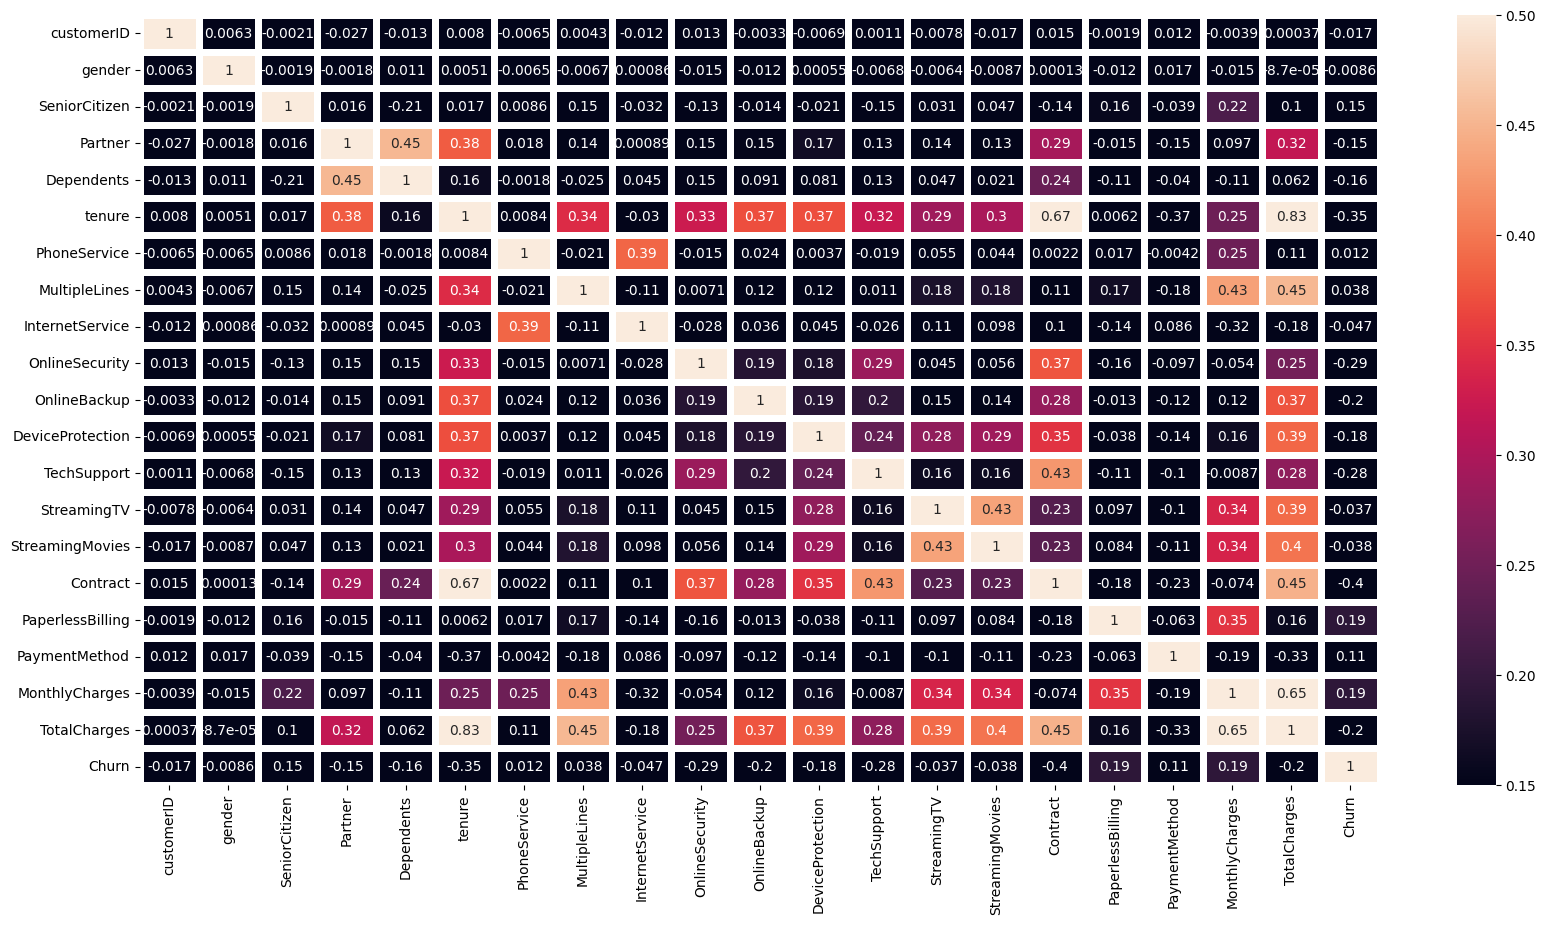

In [18]:
plt.figure(figsize = (20, 10))
sns.heatmap(telco.corr(), linewidths = 5, vmin = 0.15, vmax = 0.5, annot = True)
plt.yticks(rotation = 0);

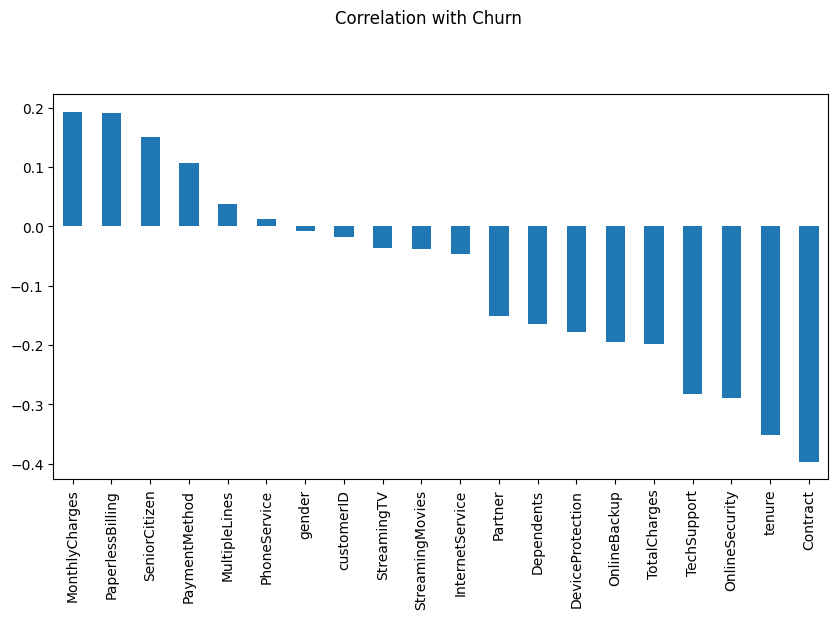

In [19]:
plt.figure(figsize = (10, 5))
telco.corr()["Churn"].sort_values(ascending = False)[1:].plot(kind = "bar");

plt.suptitle("Correlation with Churn", x = 0.5, y = 1.05, ha = "center")
plt.show()

In [20]:
bar_trace = go.Bar(x = telco.corr()["Churn"].sort_values(ascending=False)[1:].index,
                   y = telco.corr()["Churn"].sort_values(ascending=False)[1:].values)

fig = go.Figure(bar_trace)

fig.update_layout(title = "Correlation of Features with Churn", title_x = 0.5,
                  xaxis = dict(title = "Features", tickangle = 45, tickmode = "array",
                               tickvals = telco.corr()["Churn"].sort_values(ascending=False)[1:].index),
                  yaxis = dict(title = "Correlation with Churn"), height = 600, width = 1200)

fig.show()

In [21]:
num_rows = math.ceil(len(telco2.columns[1:]) / 3)

fig = make_subplots(rows = num_rows, cols = 3, subplot_titles = telco2.columns[1:], vertical_spacing = 0.1)

for i, column in enumerate(telco2.columns[1:]):
    row = i // 3 + 1
    col = i % 3 + 1

    hist_trace = go.Histogram(x = telco2[column], name = column, marker = dict(line = dict(color = 'black', width = 1)))
    fig.add_trace(hist_trace, row = row, col = col)

fig.update_layout(height = num_rows * 400, width = 1200, showlegend = False)
fig.show()

In [22]:
fig = make_subplots(rows = 1, cols = 3, subplot_titles = ["Tenure", "Monthly Charges", "Total Charges"])

fig.add_trace(go.Box(y = telco["tenure"], name = "Tenure"), row = 1, col = 1)
fig.add_trace(go.Box(y = telco["MonthlyCharges"], name = "Monthly Charges"), row = 1, col = 2)
fig.add_trace(go.Box(y = telco["TotalCharges"], name = "Total Charges"), row = 1, col = 3)

fig.update_layout(height = 500, width = 1200, showlegend = False)
fig.show()

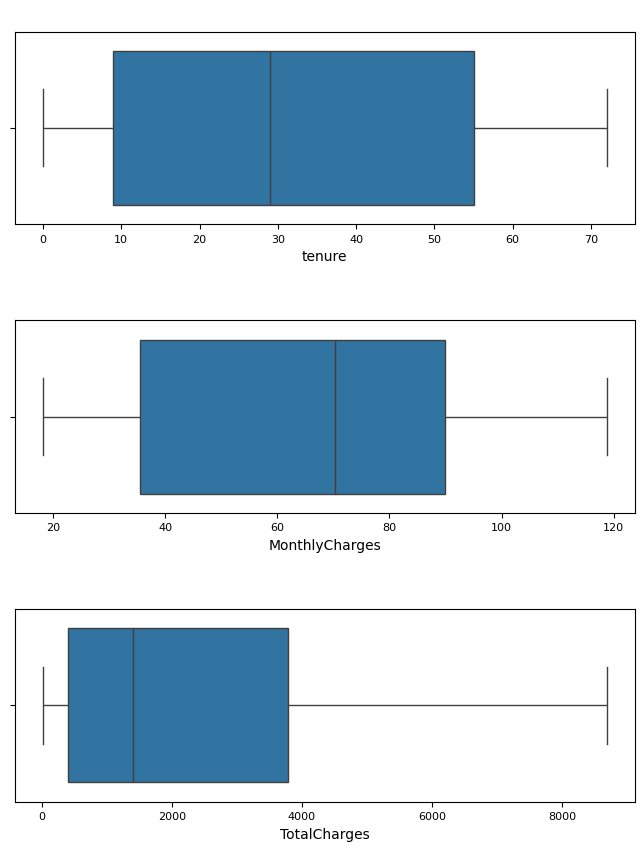

In [23]:
fig, axes = plt.subplots(3, 1, figsize = (8, 10))

for ax in axes:
    ax.tick_params(axis = "x", labelsize = 8)
    ax.tick_params(axis = "y", labelsize = 8)
    ax.set_title(" ", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)

tenure = sns.boxplot(x = telco2["tenure"], ax = axes[0])

MonthlyCharges = sns.boxplot(x = telco2["MonthlyCharges"], ax = axes[1])

TotalCharges = sns.boxplot(x = telco2["TotalCharges"], ax = axes[2])

plt.show()

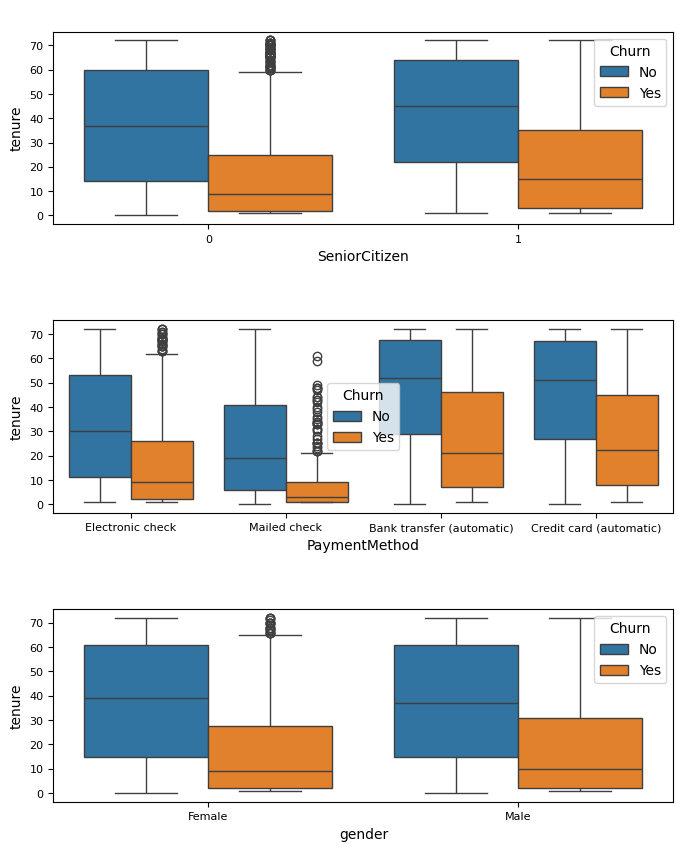

In [24]:
fig, axes = plt.subplots(3, 1, figsize = (8, 10))

for ax in axes:
    ax.tick_params(axis = "x", labelsize = 8)
    ax.tick_params(axis = "y", labelsize = 8)
    ax.set_title(" ", fontsize = 12)

plt.subplots_adjust(hspace = 0.5)

senior_citizen = sns.boxplot(x = telco2["SeniorCitizen"], y = telco2["tenure"], hue = telco2["Churn"], ax = axes[0])

payment_method = sns.boxplot(x = telco2["PaymentMethod"], y = telco2["tenure"], hue = telco2["Churn"], ax = axes[1])

gender = sns.boxplot(x = telco2["gender"], y = telco2["tenure"], hue = telco2["Churn"], ax = axes[2])

plt.show()

**Most important variables (feature importance) that affect the target label.**

Some of the more important features that result in lower churn (in no particular order) include having a partner, dependents, longer tenures, shorter contract types, non-paperless billing, and payment method. Automatic bank transfers churned the least, followed by automatic credit card payments, electronic check payments, and mailed check payments which churned by far the most.

**Splitting the dataset into training and test datasets (80/20 ratio).**

In [25]:
X = telco.drop(["Churn", "customerID"], axis = 1)
y = telco["Churn"]

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(X, test_size = 0.20, random_state = 0)

print(train.shape)
print(test.shape)

(5634, 19)
(1409, 19)


**Using SweetViz's "compare" command, contrast the training vs test datasets on the target ("churn").**

In [27]:
import sweetviz as sv
sv.compare(train, test).show_html("Compare.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Data Preprocessing**

Data imputation, feature selection, and scaling. Encode categorical features.


In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

print(X.shape)
print(train.shape)
print(test.shape)
print(y.shape)

(7043, 19)
(5634, 19)
(1409, 19)
(7043,)


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = SelectKBest(chi2, k = 5).fit_transform(X, y)
X.shape

(7043, 5)

In [30]:
X = scaler.fit_transform(X)
X.shape

(7043, 5)

**Fit models on original dataset, and build each model independently via default parameters.**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

**Naïve Bayes (Gaussian), Logistic Regression, Random Forest, and XGBoost**

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers  = {"Gaussian Naive Bayes": GaussianNB(), "Logistic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier()}

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns =["Classifier", "y", "Accuracy", "Precision", "Recall", "F1-Score"])

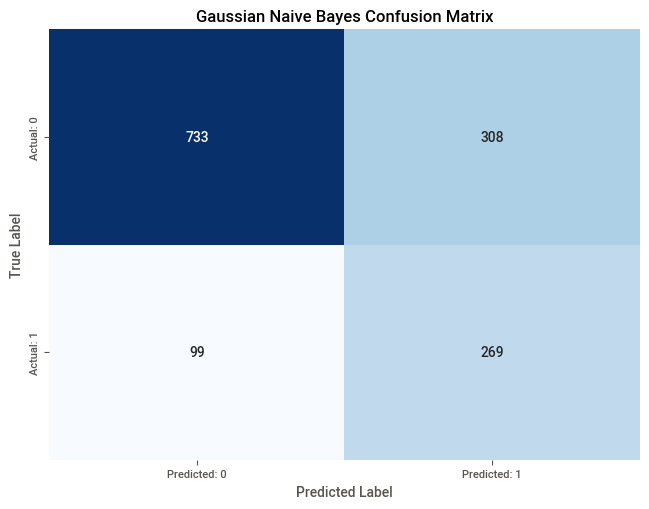

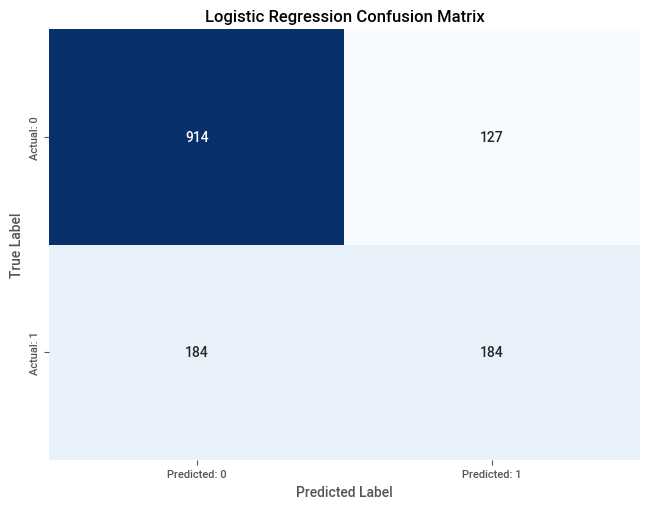

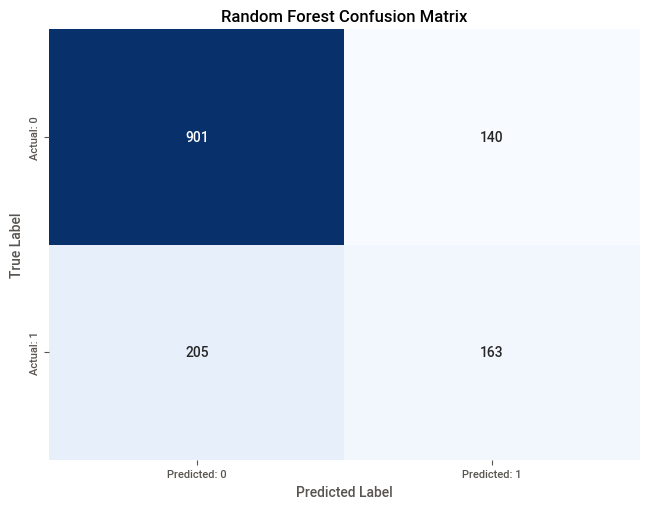

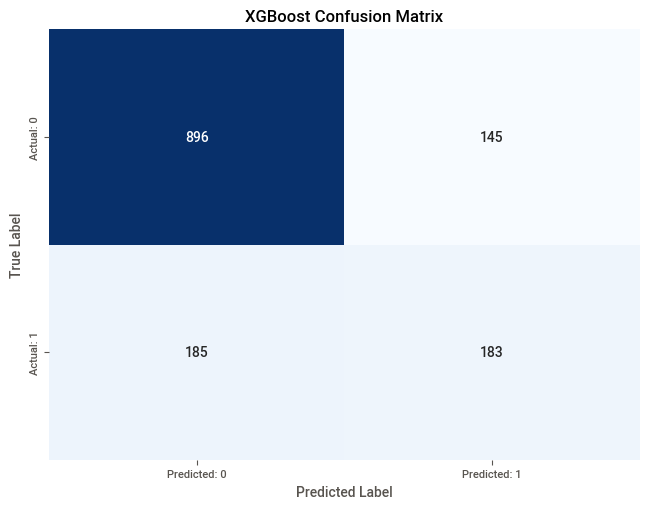

In [34]:
for classifier in classifiers:
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    y_pred_0 = y_pred[y_test == 0]
    y_test_0 = y_test[y_test == 0]
    accuracy_0 = "{:.4f}".format(accuracy_score(y_test_0, y_pred_0))

    y_pred_1 = y_pred[y_test == 1]
    y_test_1 = y_test[y_test == 1]
    accuracy_1 = "{:.4f}".format(accuracy_score(y_test_1, y_pred_1))

    accuracy = [accuracy_0, accuracy_1]

    CR = classification_report(y_test, y_pred, output_dict=True)
    CR = pd.DataFrame(CR).transpose()[:2]

    for line_number in range(len(CR)):
        new_row = {"Classifier": classifier, "y": line_number, "Accuracy": accuracy[line_number],
                   "Precision": "{:.4f}".format(CR["precision"][line_number]), "Recall": "{:.4f}".format(CR["recall"][line_number]),
                   "F1-Score": "{:.4f}".format(CR["f1-score"][line_number])}

        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted: 0', 'Predicted: 1'],
                yticklabels = ['Actual: 0', 'Actual: 1'])

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{classifier} Confusion Matrix')
    plt.show()

In [35]:
results

,Classifier,y,Accuracy,Precision,Recall,F1-Score
0,Gaussian Naive Bayes,0,0.7041,0.8810,0.7041,0.7827
1,Gaussian Naive Bayes,1,0.7310,0.4662,0.7310,0.5693
2,Logistic Regression,0,0.8780,0.8324,0.8780,0.8546
3,Logistic Regression,1,0.5000,0.5916,0.5000,0.5420
4,Random Forest,0,0.8655,0.8146,0.8655,0.8393
5,Random Forest,1,0.4429,0.5380,0.4429,0.4858
6,XGBoost,0,0.8607,0.8289,0.8607,0.8445
7,XGBoost,1,0.4973,0.5579,0.4973,0.5259


**Tuning Random Forest and XGBoost**

In [36]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

print("Feature Importance of Random Forest with Parameters: \n")
for name, score in zip(telco2, rf.feature_importances_):
    print(name, score)

Feature Importance of Random Forest with Parameters: 

customerID 0.1760784679655783
gender 0.06002189121166281
SeniorCitizen 0.12484522206099276
Partner 0.3268698417056513
Dependents 0.3121845770561149


In [37]:
xgb = XGBClassifier().fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

print("\n Feature Importance of XGBoost Classifier with Parameters: \n")
for name, score in zip(telco2, xgb.feature_importances_):
    print(name, score)


 Feature Importance of XGBoost Classifier with Parameters: 

customerID 0.04991047
gender 0.16270149
SeniorCitizen 0.7087539
Partner 0.043402247
Dependents 0.035231896


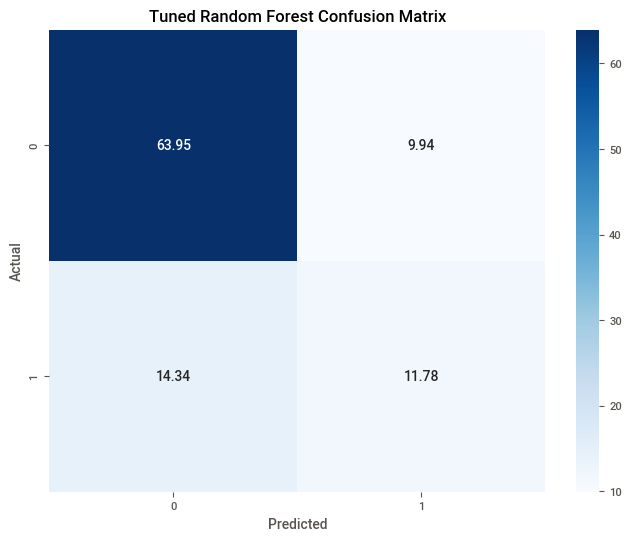

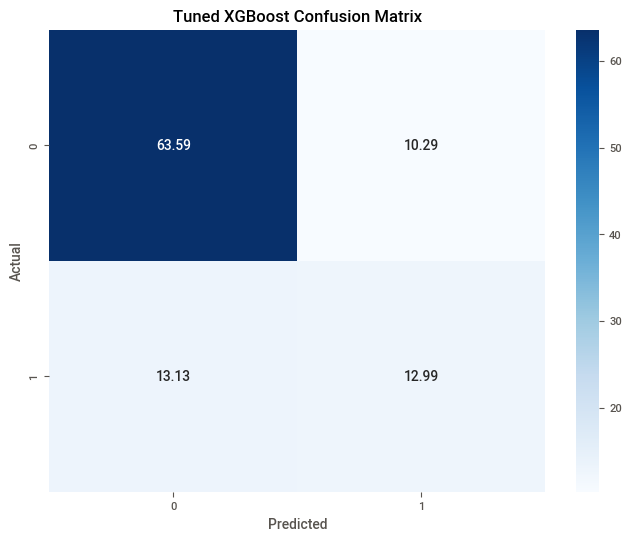

In [38]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = (confusion_matrix(y_true, y_pred) / confusion_matrix(y_true, y_pred).astype(float).sum()) * 100
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, rf_y_pred, "Tuned Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, xgb_y_pred, "Tuned XGBoost Confusion Matrix")

In [39]:
print("Random Forest \nClassification Matrix: \n", classification_report(y_test, rf_y_pred))

Random Forest 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1041
           1       0.54      0.45      0.49       368

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



In [40]:
print("XGBoost \nClassification Matrix: \n", classification_report(y_test, xgb_y_pred))

XGBoost 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1041
           1       0.56      0.50      0.53       368

    accuracy                           0.77      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



**Comparing the two stages of analysis**

NB 0.7628383233532934
LR 0.5222954091816367
RF 0.4910086493679308
XGB 0.5043433133732534
[array([0.782     , 0.764     , 0.74251497]), array([0.512     , 0.498     , 0.55688623]), array([0.484     , 0.502     , 0.48702595]), array([0.524     , 0.504     , 0.48502994])]


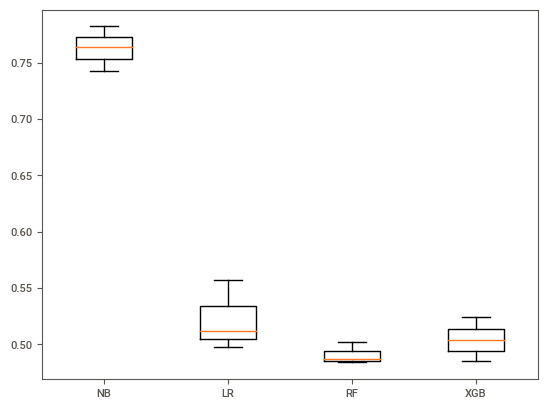

In [41]:
from sklearn.model_selection import cross_val_score

models = []

def classification_Models(X_train, X_test, y_train, y_test):
    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(modeloutcomes)
    ax.set_xticklabels(modelnames)

classification_Models(X_train, X_test, y_train, y_test)


In [42]:
import plotly.graph_objects as go

models = []

def classification_Models(X_train, X_test, y_train, y_test):
    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)

    fig = go.Figure()
    for modelname, modeloutcome in zip(modelnames, modeloutcomes):
      fig.add_trace(go.Box(y = modeloutcome, name = modelname))

    fig.update_layout(xaxis = dict(tickmode = "array", tickvals = list(range(len(modelnames))), ticktext = modelnames),
                      title = "Model Outcomes", xaxis_title = "Model", yaxis_title = "Recall Score", height = 600, width = 600)
    fig.show()

classification_Models(X_train, X_test, y_train, y_test)

NB 0.7628383233532934
LR 0.5222954091816367
RF 0.49167797737857616
XGB 0.5043433133732534
[array([0.782     , 0.764     , 0.74251497]), array([0.512     , 0.498     , 0.55688623]), array([0.486     , 0.506     , 0.48303393]), array([0.524     , 0.504     , 0.48502994])]


**Applying the SMOTE Technique**

Presenting metric comparison.

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_train, y_train = smote.fit_resample(X_train, y_train)

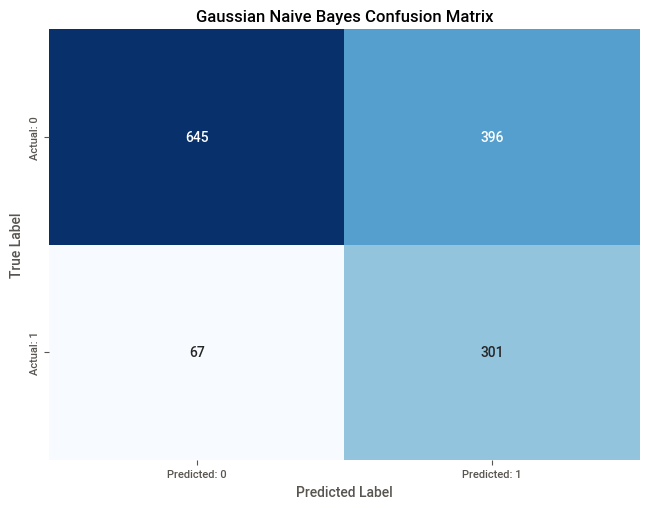

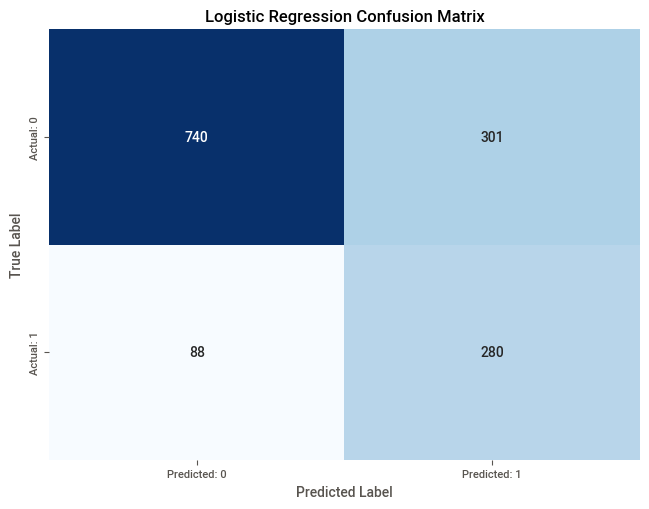

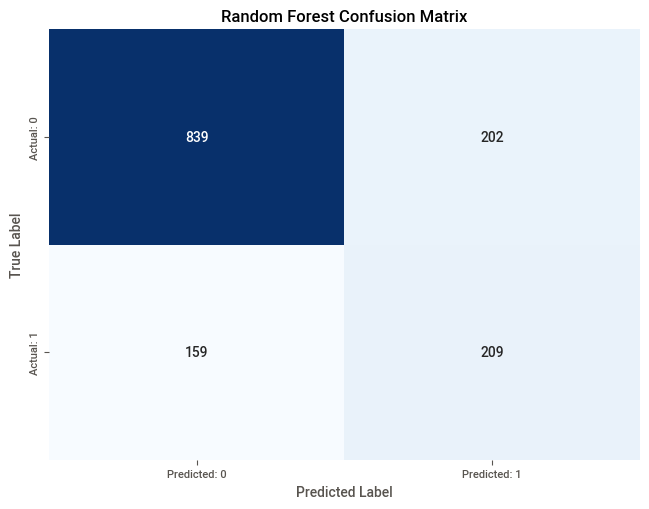

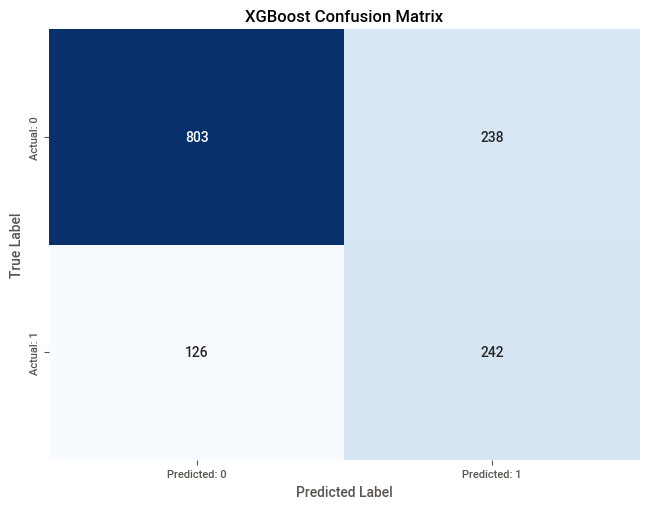

In [44]:
for classifier in classifiers:
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    y_pred_0 = y_pred[y_test == 0]
    y_test_0 = y_test[y_test == 0]
    accuracy_0 = "{:.4f}".format(accuracy_score(y_test_0, y_pred_0))

    y_pred_1 = y_pred[y_test == 1]
    y_test_1 = y_test[y_test == 1]
    accuracy_1 = "{:.4f}".format(accuracy_score(y_test_1, y_pred_1))

    accuracy = [accuracy_0, accuracy_1]

    CR = classification_report(y_test, y_pred, output_dict=True)
    CR = pd.DataFrame(CR).transpose()[:2]

    for line_number in range(len(CR)):
        new_row = {"Classifier": classifier, "y": line_number, "Accuracy": accuracy[line_number],
                   "Precision": "{:.4f}".format(CR["precision"][line_number]), "Recall": "{:.4f}".format(CR["recall"][line_number]),
                   "F1-Score": "{:.4f}".format(CR["f1-score"][line_number])}

        results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, xticklabels = ['Predicted: 0', 'Predicted: 1'],
                yticklabels = ['Actual: 0', 'Actual: 1'])

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{classifier} Confusion Matrix')
    plt.show()

In [45]:
results

,Classifier,y,Accuracy,Precision,Recall,F1-Score
0,Gaussian Naive Bayes,0,0.7041,0.8810,0.7041,0.7827
1,Gaussian Naive Bayes,1,0.7310,0.4662,0.7310,0.5693
2,Logistic Regression,0,0.8780,0.8324,0.8780,0.8546
3,Logistic Regression,1,0.5000,0.5916,0.5000,0.5420
4,Random Forest,0,0.8655,0.8146,0.8655,0.8393
5,Random Forest,1,0.4429,0.5380,0.4429,0.4858
6,XGBoost,0,0.8607,0.8289,0.8607,0.8445
7,XGBoost,1,0.4973,0.5579,0.4973,0.5259
8,Gaussian Naive Bayes,0,0.6196,0.9059,0.6196,0.7359
9,Gaussian Naive Bayes,1,0.8179,0.4319,0.8179,0.5653


**Hyperparameter tuning Random Forest and XGBoost.**

In [46]:
rf1 = RandomForestClassifier(n_estimators = 300, max_leaf_nodes = 10).fit(X_train, y_train)
rf1_y_pred = rf1.predict(X_test)

print("Feature Importance of Random Forest Classifier with Parameters: \n")
for name, score in zip(telco2, rf1.feature_importances_):
    print(name, score)

Feature Importance of Random Forest Classifier with Parameters: 

customerID 0.18780710615660642
gender 0.1853734161293585
SeniorCitizen 0.4540768672363458
Partner 0.11282443374599105
Dependents 0.05991817673169823


In [47]:
xgb1 = XGBClassifier(n_estimators = 300, max_leaf_nodes = 10)
xgb1.fit(X_train, y_train)
xgb1_y_pred = xgb1.predict(X_test)

print("Feature Importance of XGBoost Classifier with Parameters: \n")
for name, score in zip(telco2, xgb1.feature_importances_):
    print(name, score)

Feature Importance of XGBoost Classifier with Parameters: 

customerID 0.072910905
gender 0.13814703
SeniorCitizen 0.67857873
Partner 0.059310384
Dependents 0.051052824


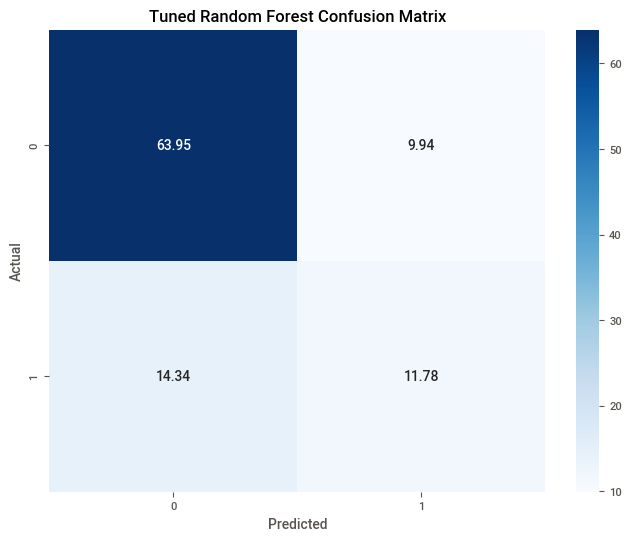

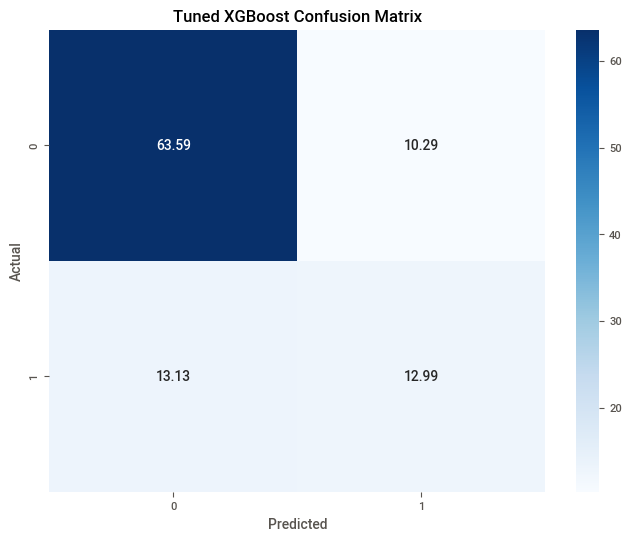

In [48]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = (confusion_matrix(y_test, y_pred) / confusion_matrix(y_test, y_pred).astype(float).sum()) * 100
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, rf_y_pred, "Tuned Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, xgb_y_pred, "Tuned XGBoost Confusion Matrix")

In [49]:
print("Random Forest \nClassification Matrix: \n", classification_report(y_test, rf1_y_pred))

Random Forest 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      1041
           1       0.47      0.77      0.58       368

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.73      1409



In [50]:
print("XGBoost \nClassification Matrix: \n", classification_report(y_test, xgb1_y_pred))

XGBoost 
Classification Matrix: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1041
           1       0.49      0.60      0.53       368

    accuracy                           0.73      1409
   macro avg       0.67      0.69      0.67      1409
weighted avg       0.75      0.73      0.74      1409



**Comparing alternate stage analyses. Algorithm selection & model evaluation.**


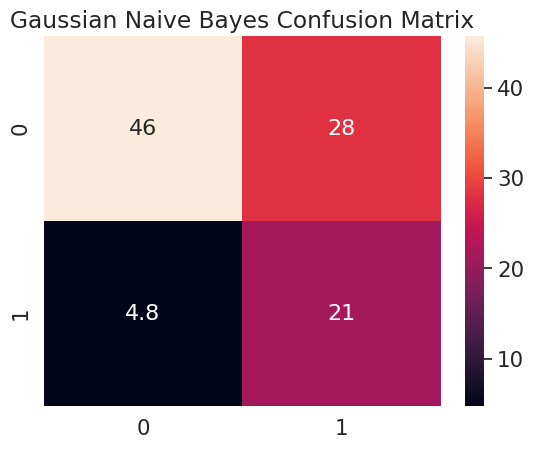

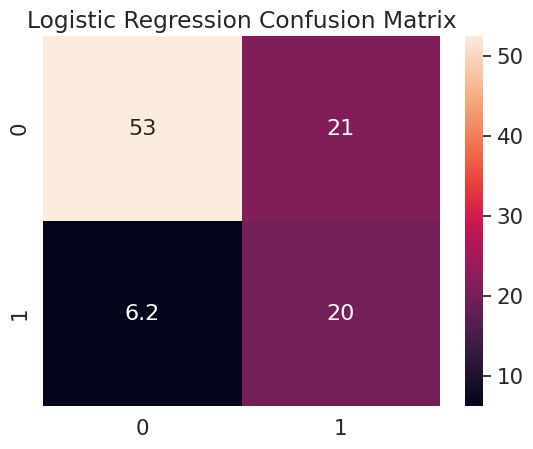

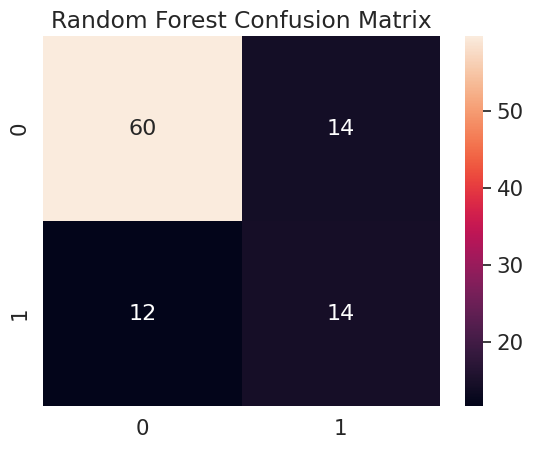

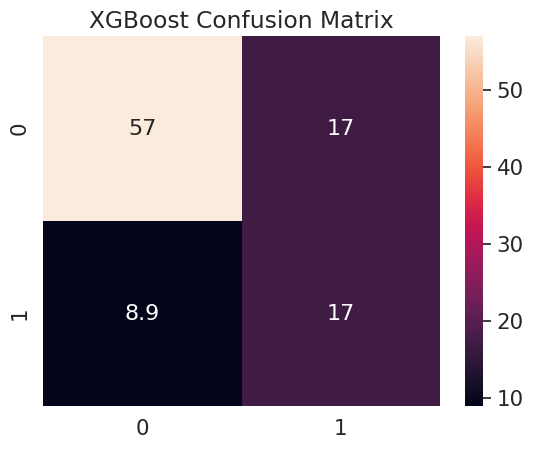

In [51]:
comparison = pd.DataFrame(columns = ["Classifier", "y", "Accuracy", "Precision", "Recall", "F1-Score"])

for classifier in classifiers.keys():
    classifiers[classifier].fit(X_train, y_train)
    y_pred = classifiers[classifier].predict(X_test)
    cm = (confusion_matrix(y_test, y_pred) / confusion_matrix(y_test, y_pred).astype(float).sum()) * 100
    comparison_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
    sns.set(font_scale = 1.4)
    sns.heatmap(comparison_cm, annot = True, annot_kws = {"size": 16})
    plt.title("{classifier} Confusion Matrix".format(classifier = classifier))
    plt.show()

NB 0.8509555876678827
LR 0.8042569211024014
RF 0.8345078575069942
XGB 0.8330573570430518
[array([0.84397678, 0.85039942, 0.85849057]), array([0.79317852, 0.79811184, 0.82148041]), array([0.75544267, 0.85548293, 0.89259797]), array([0.76342525, 0.85911402, 0.8766328 ])]


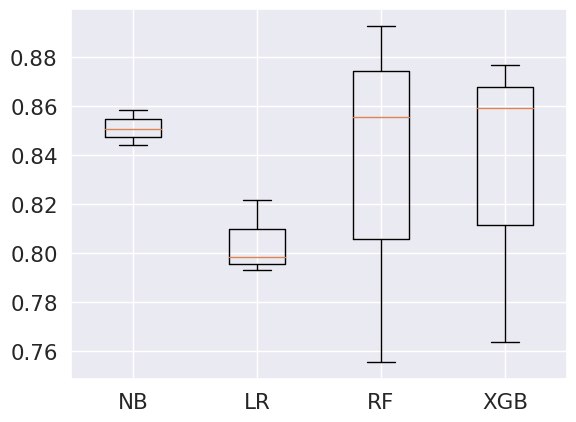

In [52]:
models = []

def classification_Models(X_train, X_test, y_train, y_test):
    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(modeloutcomes)
    ax.set_xticklabels(modelnames)

classification_Models(X_train, X_test, y_train, y_test)

In [53]:
models = []

def classification_Models(X_train, X_test, y_train, y_test):

    models.append(("NB", GaussianNB()))
    models.append(("LR", LogisticRegression()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("XGB", XGBClassifier()))

    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 3, scoring = "recall", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)

    print(modeloutcomes)

    fig = go.Figure()
    for modelname, modeloutcome in zip(modelnames, modeloutcomes):
        fig.add_trace(go.Box(y = modeloutcome, name = modelname))

    fig.update_layout(xaxis = dict(tickmode = "array", tickvals = list(range(len(modelnames))), ticktext = modelnames),
                      title = "Model Outcomes", xaxis_title = "Model", yaxis_title = "Recall Score", height = 600, width = 600)
    fig.show()

classification_Models(X_train, X_test, y_train, y_test)

NB 0.8509555876678827
LR 0.8042569211024014
RF 0.8345087358529213
XGB 0.8330573570430518
[array([0.84397678, 0.85039942, 0.85849057]), array([0.79317852, 0.79811184, 0.82148041]), array([0.75616836, 0.85911402, 0.88824383]), array([0.76342525, 0.85911402, 0.8766328 ])]
